<a href="https://colab.research.google.com/github/prototype99/datasci-webinar/blob/main/pods_2223_w11_webinar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
diabetes = pd.read_csv(
    'https://raw.githubusercontent.com/gerberl/6G7V0026-2223/main/datasets/diabetes.csv'
)
diabetes.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


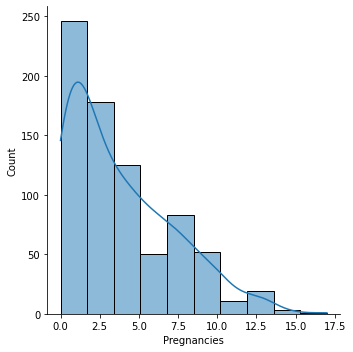

In [ ]:
sns.displot(x=diabetes['Pregnancies'], bins=10, kde=True);

In [ ]:
diabetes['Pregnancies'].describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [ ]:
diabetes['Pregnancies'].mode()

0    1
dtype: int64

In [ ]:
# BMI discretised (categorical)
# Glucose (quantitative)
# Outcome (categorical, target)
BMI_cat = pd.cut(
    diabetes['BMI'],
    bins=[0, 18.5, 25, 30, 1000],
    labels=['underweight', 'normal', 'overweight', 'obese'],
    include_lowest=True,
    right=False
)
BMI_cat

0           obese
1      overweight
2          normal
3      overweight
4           obese
          ...    
763         obese
764         obese
765    overweight
766         obese
767         obese
Name: BMI, Length: 768, dtype: category
Categories (4, object): ['underweight' < 'normal' < 'overweight' < 'obese']

In [ ]:
diabetes_cat = diabetes.assign(
    BMI_cat = pd.cut(
        diabetes['BMI'],
        bins=[0, 18.5, 25, 30, 1000],
        labels=['underweight', 'normal', 'overweight', 'obese'],
        include_lowest=True,
        right=False
    )
)

In [ ]:
diabetes_cat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_cat
0,6,148,72,35,0,33.6,0.627,50,1,obese
1,1,85,66,29,0,26.6,0.351,31,0,overweight
2,8,183,64,0,0,23.3,0.672,32,1,normal
3,1,89,66,23,94,28.1,0.167,21,0,overweight
4,0,137,40,35,168,43.1,2.288,33,1,obese


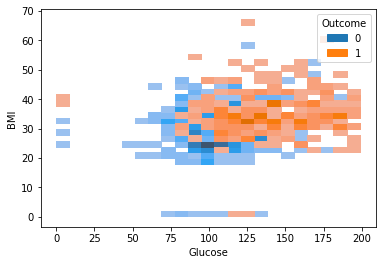

In [ ]:
# BMI (quantitative)
# Glucose (quantitative)
# Outcome (categorical, target)
sns.histplot(data=diabetes_cat, x='Glucose', y='BMI', hue='Outcome');

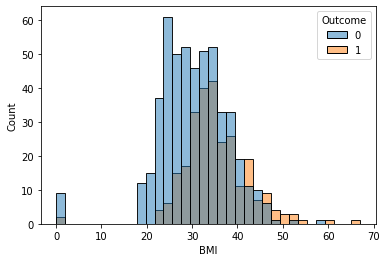

In [ ]:
sns.histplot(data=diabetes_cat, x='BMI', hue='Outcome');

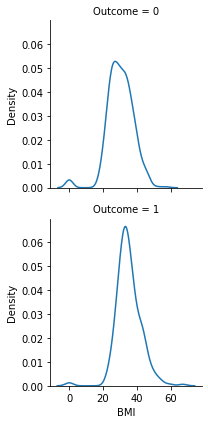

In [ ]:
g = sns.FacetGrid(data=diabetes_cat, row='Outcome')
g.map(sns.kdeplot, 'BMI');

In [ ]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# BMI (categorical)
# Glucose (quantitative)
# Outcome (categorical, target)
diabetes_cat.groupby(['BMI_cat', 'Outcome'])['Glucose'].mean()

BMI_cat      Outcome
underweight  0           99.076923
             1          120.000000
normal       0          104.326316
             1          157.571429
overweight   0          112.014388
             1          131.400000
obese        0          111.545455
             1          142.730594
Name: Glucose, dtype: float64

In [ ]:
diabetes_cat.groupby(['BMI_cat', 'Outcome'])['Glucose'].mean().unstack()

Outcome,0,1
BMI_cat,,
underweight,99.076923,120.000000
normal,104.326316,157.571429
overweight,112.014388,131.400000
obese,111.545455,142.730594


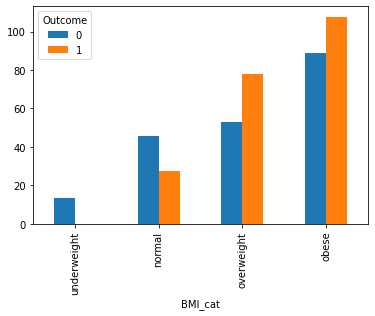

In [ ]:
diabetes_cat.groupby(['BMI_cat', 'Outcome'])['Insulin'].mean().unstack().plot.bar();

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
sns.load_dataset('healthexp')

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7
